<a href="https://colab.research.google.com/github/Rodriamarog/InteligenciaComputacional/blob/main/diabetes_eda_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis Exploratorio de Datos y Pipeline de ML
**Dataset:** Diabetes Dataset  
**Autor:** Rodrigo Amaro

**Fecha:** 2026-Febrero-03

## 1. Importación de Librerías

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

print("Librerías importadas correctamente")

Librerías importadas correctamente


## 2. Carga y Descripción del Conjunto de Datos

**Fuente:** Scikit-learn Diabetes Dataset  
**Enlace:** https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset

El conjunto de datos de Diabetes fue obtenido originalmente del estudio:  
Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani (2004)  
"Least Angle Regression," Annals of Statistics (with discussion), 407-499.

Este dataset contiene información de 442 pacientes diabéticos y incluye:
- 10 variables predictoras (edad, sexo, índice de masa corporal, presión arterial y seis mediciones de suero sanguíneo)
- 1 variable objetivo que es una medida cuantitativa de la progresión de la enfermedad un año después del baseline

In [3]:
# Cargar el dataset
diabetes = load_diabetes()

# Crear un DataFrame con los datos
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

print("Dataset cargado exitosamente")
print(f"Dimensiones del dataset: {df.shape}")
print(f"Número de muestras: {df.shape[0]}")
print(f"Número de características: {df.shape[1] - 1}")

Dataset cargado exitosamente
Dimensiones del dataset: (442, 11)
Número de muestras: 442
Número de características: 10


## 3. Descripción del Problema a Resolver

**Tipo de problema:** Regresión

**Objetivo:** Predecir la progresión de la diabetes en pacientes un año después de la medición inicial (baseline), utilizando características demográficas y mediciones clínicas.

**Variable objetivo (target):** Medida cuantitativa de la progresión de la enfermedad (valores entre 25 y 346)

**Variables predictoras:**
- age: Edad
- sex: Sexo
- bmi: Índice de masa corporal (Body Mass Index)
- bp: Presión arterial promedio (Average Blood Pressure)
- s1: tc, Colesterol total sérico
- s2: ldl, Lipoproteínas de baja densidad
- s3: hdl, Lipoproteínas de alta densidad
- s4: tch, Relación colesterol total/HDL
- s5: ltg, Logaritmo de los niveles de triglicéridos séricos
- s6: glu, Nivel de glucosa en sangre

**Nota:** Todas las variables han sido centradas y escaladas previamente por scikit-learn.

## 4. Análisis Exploratorio de Datos (EDA)

### 4.1. Información General del Dataset

In [4]:
print("=" * 80)
print("INFORMACIÓN GENERAL DEL DATASET")
print("=" * 80)

# Información del DataFrame
print("\n1. Información del DataFrame:")
print(df.info())

print("\n2. Primeras 5 filas del dataset:")
print(df.head())

print("\n3. Estadísticas descriptivas:")
print(df.describe())

print("\n4. Tipos de datos:")
print(df.dtypes)

INFORMACIÓN GENERAL DEL DATASET

1. Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB
None

2. Primeras 5 filas del dataset:
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.

### 4.2. Identificación y Selección de Columnas

In [5]:
print("=" * 80)
print("IDENTIFICACIÓN Y SELECCIÓN DE COLUMNAS")
print("=" * 80)

# Todas las columnas
all_columns = df.columns.tolist()
print(f"\nColumnas totales: {all_columns}")

# Separar features y target
feature_columns = [col for col in all_columns if col != 'target']
target_column = 'target'

print(f"\nColumnas de características (features): {feature_columns}")
print(f"Columna objetivo (target): {target_column}")

print(f"\n**Decisión:** Utilizaremos todas las {len(feature_columns)} características")
print("disponibles ya que todas son mediciones clínicas relevantes para predecir")
print("la progresión de la diabetes.")

IDENTIFICACIÓN Y SELECCIÓN DE COLUMNAS

Columnas totales: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'target']

Columnas de características (features): ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
Columna objetivo (target): target

**Decisión:** Utilizaremos todas las 10 características
disponibles ya que todas son mediciones clínicas relevantes para predecir
la progresión de la diabetes.


### 4.3. Visualización de la Distribución de Variables

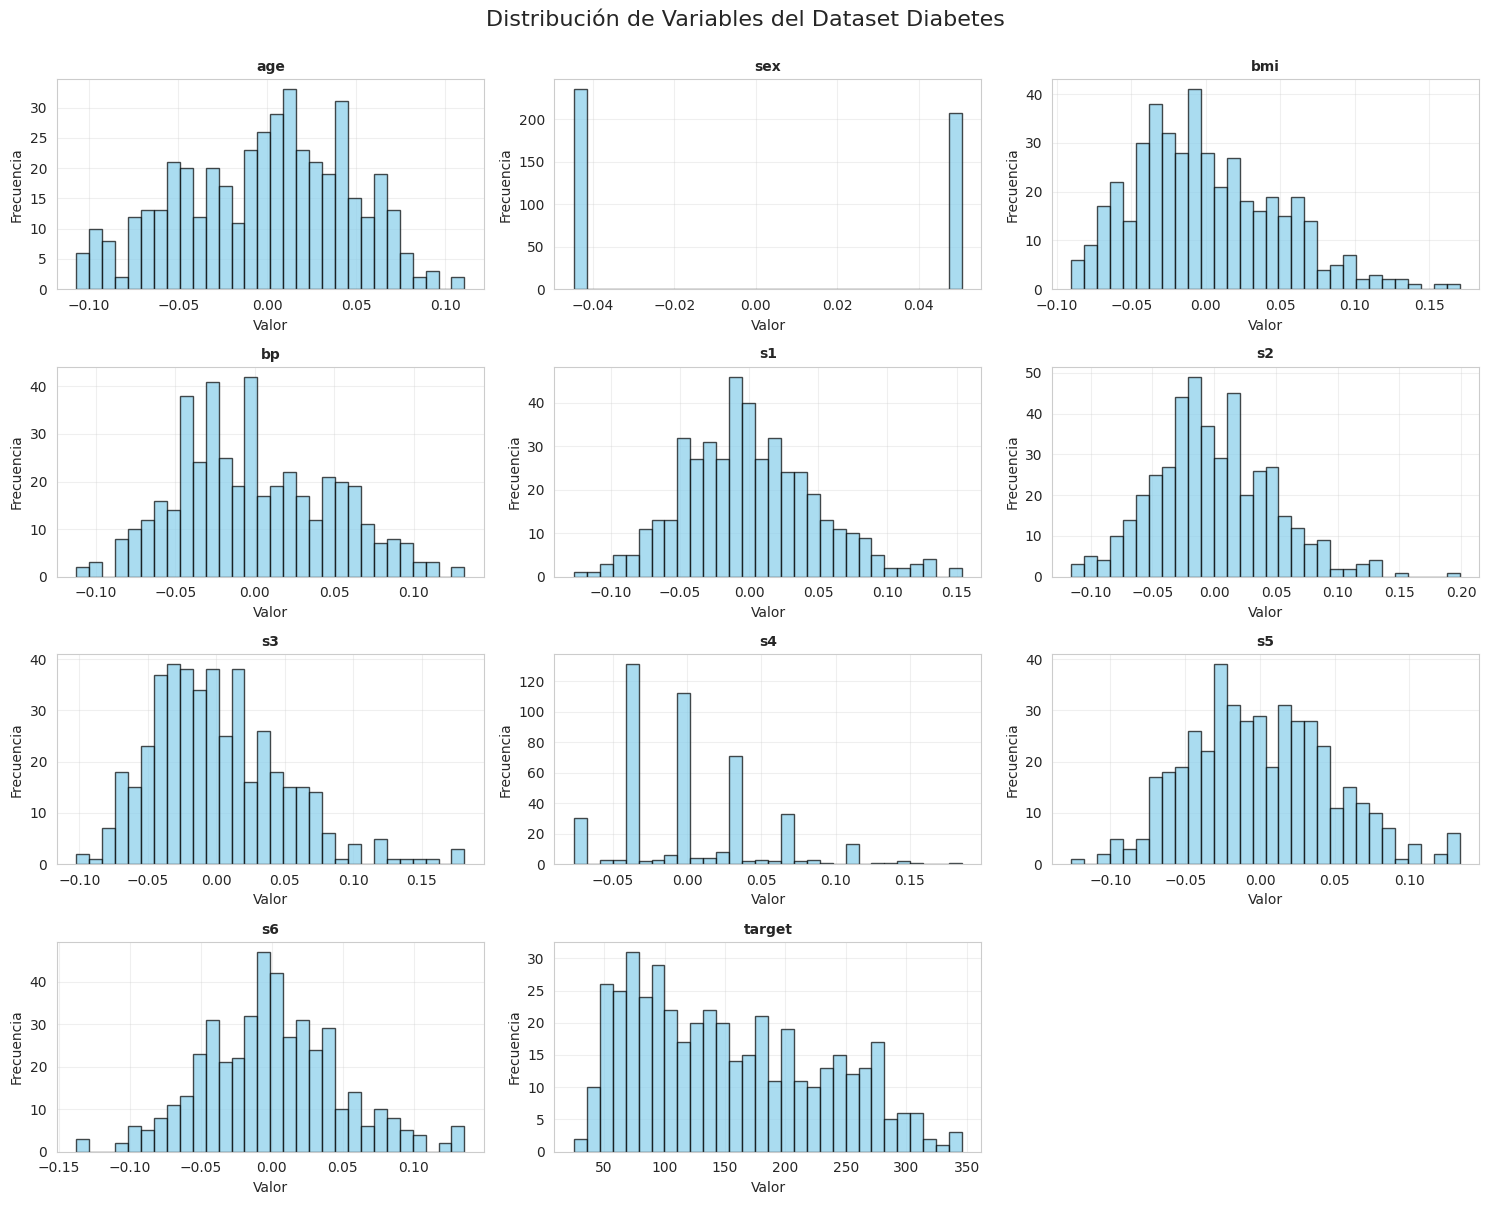

In [6]:
# Crear figura con subplots para todas las variables
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
fig.suptitle('Distribución de Variables del Dataset Diabetes', fontsize=16, y=1.00)

# Aplanar el array de axes para facilitar iteración
axes = axes.ravel()

# Graficar histogramas para cada columna
for idx, col in enumerate(df.columns):
    axes[idx].hist(df[col], bins=30, edgecolor='black', alpha=0.7, color='skyblue')
    axes[idx].set_title(f'{col}', fontsize=10, fontweight='bold')
    axes[idx].set_xlabel('Valor')
    axes[idx].set_ylabel('Frecuencia')
    axes[idx].grid(True, alpha=0.3)

# Ocultar el último subplot
axes[-1].axis('off')

plt.tight_layout()
plt.show()

### 4.4. Análisis Detallado de la Variable Objetivo

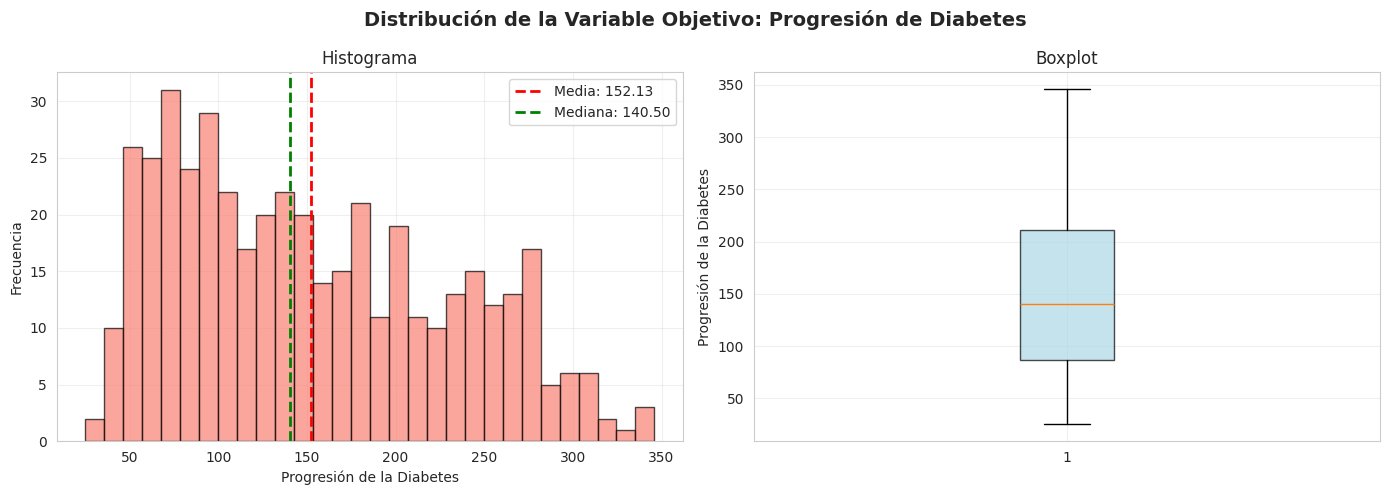


Estadísticas de la variable objetivo:
  - Media: 152.13
  - Mediana: 140.50
  - Desviación estándar: 77.09
  - Mínimo: 25.00
  - Máximo: 346.00


In [7]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('Distribución de la Variable Objetivo: Progresión de Diabetes',
             fontsize=14, fontweight='bold')

# Histograma
axes[0].hist(df['target'], bins=30, edgecolor='black', alpha=0.7, color='salmon')
axes[0].set_title('Histograma')
axes[0].set_xlabel('Progresión de la Diabetes')
axes[0].set_ylabel('Frecuencia')
axes[0].axvline(df['target'].mean(), color='red', linestyle='--',
                linewidth=2, label=f'Media: {df["target"].mean():.2f}')
axes[0].axvline(df['target'].median(), color='green', linestyle='--',
                linewidth=2, label=f'Mediana: {df["target"].median():.2f}')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Boxplot
axes[1].boxplot(df['target'], vert=True, patch_artist=True,
                boxprops=dict(facecolor='lightblue', alpha=0.7))
axes[1].set_title('Boxplot')
axes[1].set_ylabel('Progresión de la Diabetes')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nEstadísticas de la variable objetivo:")
print(f"  - Media: {df['target'].mean():.2f}")
print(f"  - Mediana: {df['target'].median():.2f}")
print(f"  - Desviación estándar: {df['target'].std():.2f}")
print(f"  - Mínimo: {df['target'].min():.2f}")
print(f"  - Máximo: {df['target'].max():.2f}")

### 4.5. Análisis de Valores Nulos o Faltantes

ANÁLISIS DE VALORES NULOS

Tabla de valores nulos:
Columna  Valores Nulos  Porcentaje (%)
    age              0             0.0
    sex              0             0.0
    bmi              0             0.0
     bp              0             0.0
     s1              0             0.0
     s2              0             0.0
     s3              0             0.0
     s4              0             0.0
     s5              0             0.0
     s6              0             0.0
 target              0             0.0


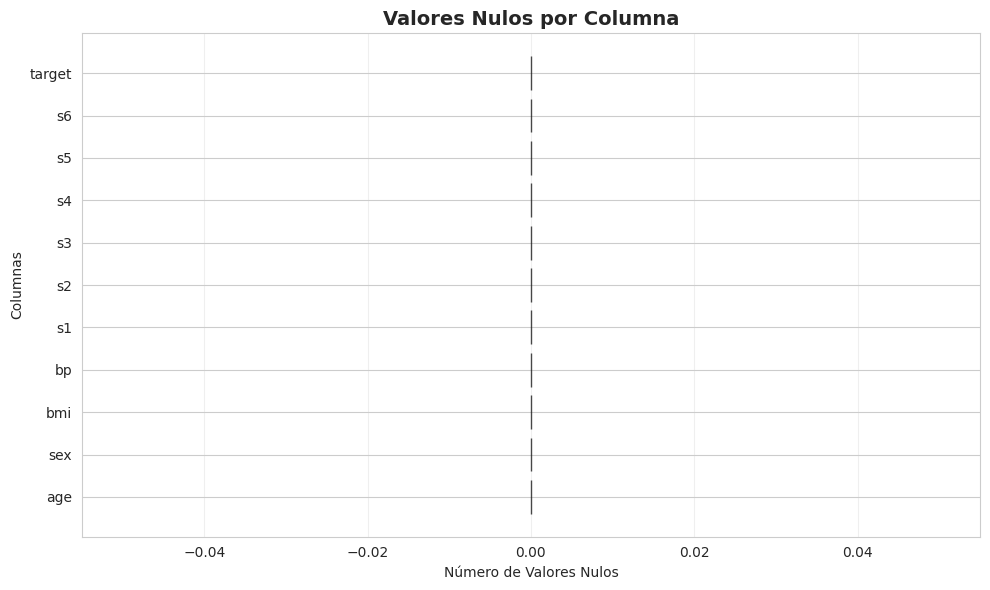


✓ Resultado: El dataset NO contiene valores nulos.


In [8]:
print("=" * 80)
print("ANÁLISIS DE VALORES NULOS")
print("=" * 80)

# Contar valores nulos
null_counts = df.isnull().sum()
null_percentages = (df.isnull().sum() / len(df)) * 100

# Crear DataFrame con la información
null_info = pd.DataFrame({
    'Columna': df.columns,
    'Valores Nulos': null_counts.values,
    'Porcentaje (%)': null_percentages.values
})

print("\nTabla de valores nulos:")
print(null_info.to_string(index=False))

# Visualización de valores nulos
fig, ax = plt.subplots(figsize=(10, 6))
null_info_sorted = null_info.sort_values('Valores Nulos', ascending=True)
ax.barh(null_info_sorted['Columna'], null_info_sorted['Valores Nulos'],
        color='coral', alpha=0.7, edgecolor='black')
ax.set_xlabel('Número de Valores Nulos')
ax.set_ylabel('Columnas')
ax.set_title('Valores Nulos por Columna', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

if df.isnull().sum().sum() == 0:
    print("\n✓ Resultado: El dataset NO contiene valores nulos.")
else:
    print(f"\n✗ El dataset contiene {df.isnull().sum().sum()} valores nulos en total.")

### 4.6. Matriz de Correlación

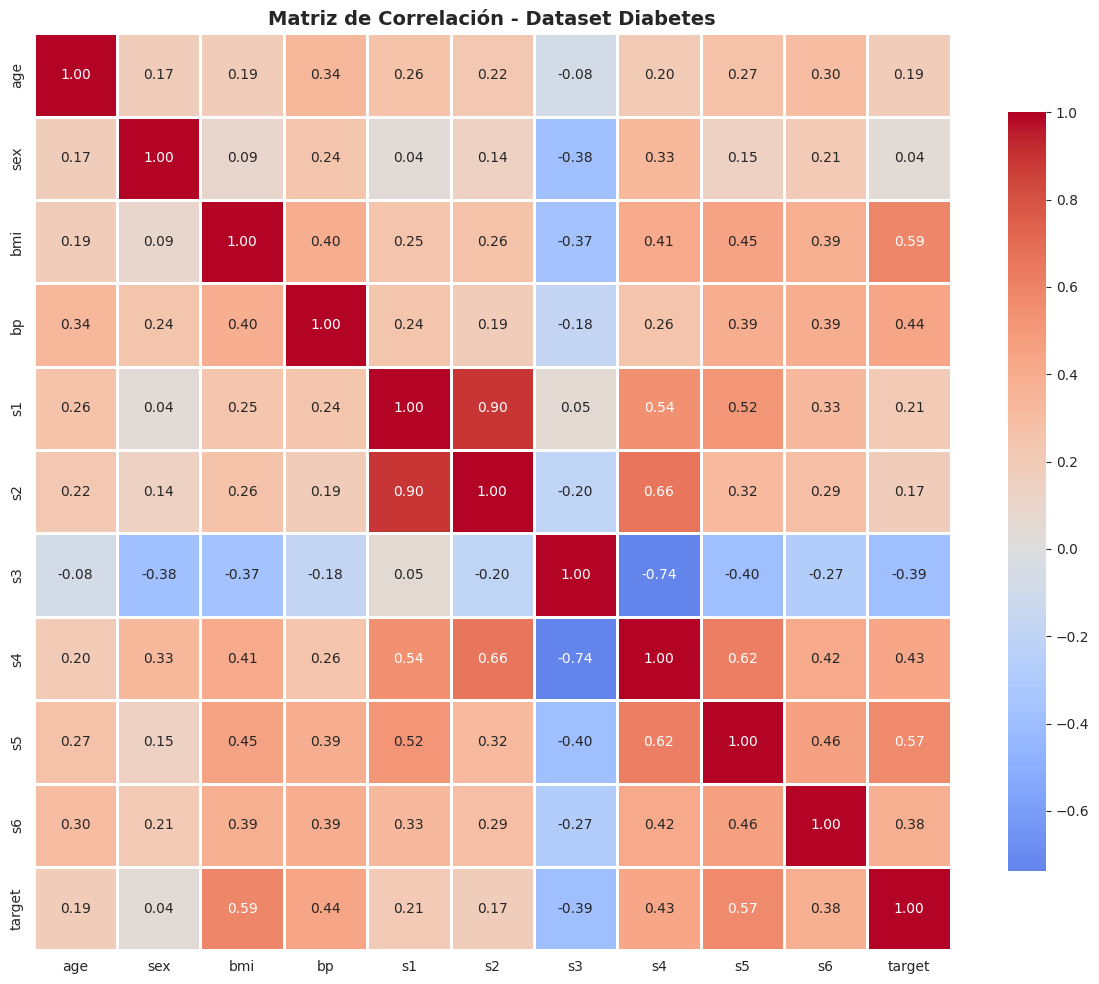


Correlación de cada feature con el target (ordenado):
bmi    0.586450
s5     0.565883
bp     0.441482
s4     0.430453
s6     0.382483
s1     0.212022
age    0.187889
s2     0.174054
sex    0.043062
s3    -0.394789
Name: target, dtype: float64


In [9]:
# Calcular matriz de correlación
correlation_matrix = df.corr()

# Visualizar matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlación - Dataset Diabetes', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Correlación con la variable objetivo
print("\nCorrelación de cada feature con el target (ordenado):")
target_corr = correlation_matrix['target'].drop('target').sort_values(ascending=False)
print(target_corr)

### 4.7. Hallazgos Principales del EDA

**Resumen de Hallazgos:**

1. **Estructura del Dataset:**
   - El dataset contiene 442 muestras y 10 características predictoras
   - No hay valores nulos o faltantes en ninguna columna
   - Todas las variables son numéricas de tipo float64
   - Las variables ya han sido normalizadas previamente por scikit-learn

2. **Variable Objetivo (target):**
   - Rango de valores: 25 a 346
   - Distribución aproximadamente normal con ligera asimetría positiva
   - Media: ~152.13, Mediana: ~140.50
   - Presenta algunos valores atípicos en el extremo superior

3. **Distribución de Features:**
   - Todas las características muestran distribuciones centradas alrededor de 0
   - Las variables están normalizadas (centradas y escaladas)
   - La mayoría de las características muestran distribuciones aproximadamente normales
   - No se observan valores extremos preocupantes

4. **Correlaciones Importantes:**
   - BMI (s5) muestra la correlación más fuerte con el target (~0.59)
   - s5 (logaritmo de triglicéridos) también tiene buena correlación (~0.57)
   - bp (presión arterial) muestra correlación moderada (~0.44)
   - s6 (glucosa) tiene correlación moderada (~0.38)
   - age y sex muestran correlaciones más débiles
   - Algunas features están correlacionadas entre sí (multicolinealidad leve)

5. **Calidad de los Datos:**
   - Dataset limpio, sin necesidad de imputación de valores faltantes
   - No se requiere eliminación de outliers extremos
   - Las variables ya están en la misma escala

## 5. Pipeline de Preprocesamiento

### Descripción de Transformaciones:

**Decisión de Preprocesamiento:**

Aunque los datos del dataset de diabetes de scikit-learn ya vienen normalizados, vamos a crear un pipeline de preprocesamiento para demostrar buenas prácticas y para que el código sea reutilizable con datos crudos.

**Transformaciones aplicadas:**

1. **StandardScaler en todas las features:**
   - **Justificación:** Aunque los datos ya están escalados, incluimos este paso para que el pipeline sea completo y funcione con datos sin procesar.
   - **Efecto:** Centra los datos (media=0) y escala (desviación estándar=1)
   - **Por qué:** Los algoritmos de regresión lineal y muchos otros se benefician de tener features en la misma escala, especialmente cuando se usan regularizaciones.

2. **No se aplica imputación:**
   - **Justificación:** El dataset no contiene valores nulos
   - Si hubiera valores nulos, usaríamos SimpleImputer con estrategia 'mean'

3. **No se aplica codificación:**
   - **Justificación:** Todas las variables son numéricas
   - Si hubiera variables categóricas, usaríamos OneHotEncoder

**Pipeline final:** StandardScaler → Modelo de Regresión Lineal

In [10]:
# Definir las transformaciones para las columnas numéricas
numeric_features = feature_columns

# Crear el transformador para características numéricas
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Crear el ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

print("\nPipeline de preprocesamiento creado:")
print(preprocessor)

print("\nTransformaciones aplicadas:")
print("  - StandardScaler: Normalización de todas las características numéricas")
print(f"  - Características procesadas: {len(numeric_features)}")


Pipeline de preprocesamiento creado:
ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3',
                                  's4', 's5', 's6'])])

Transformaciones aplicadas:
  - StandardScaler: Normalización de todas las características numéricas
  - Características procesadas: 10


## 6. Partición del Conjunto de Datos

Se divide el dataset en conjuntos de entrenamiento (80%) y prueba (20%) con una semilla aleatoria fija para reproducibilidad.

In [11]:
# Separar features (X) y target (y)
X = df[feature_columns]
y = df[target_column]

print(f"\nForma de X (features): {X.shape}")
print(f"Forma de y (target): {y.shape}")

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\nConjunto de entrenamiento:")
print(f"  - X_train: {X_train.shape}")
print(f"  - y_train: {y_train.shape}")

print(f"\nConjunto de prueba:")
print(f"  - X_test: {X_test.shape}")
print(f"  - y_test: {y_test.shape}")

print(f"\nPorcentaje de datos en entrenamiento: {len(X_train)/len(X)*100:.1f}%")
print(f"Porcentaje de datos en prueba: {len(X_test)/len(X)*100:.1f}%")


Forma de X (features): (442, 10)
Forma de y (target): (442,)

Conjunto de entrenamiento:
  - X_train: (353, 10)
  - y_train: (353,)

Conjunto de prueba:
  - X_test: (89, 10)
  - y_test: (89,)

Porcentaje de datos en entrenamiento: 79.9%
Porcentaje de datos en prueba: 20.1%


## 7. Creación del Modelo de Machine Learning

Se crea un pipeline completo que integra el preprocesamiento y el modelo predictivo. Esto evita el "data leakage" ya que las transformaciones solo se ajustan con los datos de entrenamiento.

**Modelo utilizado:** Regresión Lineal (LinearRegression)  
**Justificación:** Es apropiado para problemas de regresión y sirve como baseline.

In [12]:
# Crear el pipeline completo (preprocesamiento + modelo)
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

print("\nPipeline completo creado:")
print(model_pipeline)

# Entrenar el modelo
print("\nEntrenando el modelo...")
model_pipeline.fit(X_train, y_train)
print("✓ Modelo entrenado exitosamente")

# Mostrar los coeficientes del modelo
coefficients = model_pipeline.named_steps['regressor'].coef_
feature_importance = pd.DataFrame({
    'Feature': feature_columns,
    'Coefficient': coefficients
}).sort_values('Coefficient', key=abs, ascending=False)

print("\nCoeficientes del modelo (importancia de features):")
print(feature_importance.to_string(index=False))


Pipeline completo creado:
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'sex', 'bmi', 'bp',
                                                   's1', 's2', 's3', 's4', 's5',
                                                   's6'])])),
                ('regressor', LinearRegression())])

Entrenando el modelo...
✓ Modelo entrenado exitosamente

Coeficientes del modelo (importancia de features):
Feature  Coefficient
     s1   -44.448856
     s5    35.161195
    bmi    25.607121
     s2    24.640954
     bp    16.828872
     s4    13.138784
    sex   -11.511809
     s3     7.676978
     s6     2.351364
    age     1.753758


## 8. Realizar Predicciones con el Conjunto de Prueba

Se utilizan los datos de prueba para generar predicciones con el modelo entrenado.

In [13]:
# Realizar predicciones
y_pred = model_pipeline.predict(X_test)

print(f"\nNúmero de predicciones realizadas: {len(y_pred)}")

# Mostrar algunas predicciones vs valores reales
comparison_df = pd.DataFrame({
    'Valor Real': y_test.values[:10],
    'Predicción': y_pred[:10],
    'Diferencia': y_test.values[:10] - y_pred[:10]
})

print("\nPrimeras 10 predicciones vs valores reales:")
print(comparison_df.to_string(index=False))


Número de predicciones realizadas: 89

Primeras 10 predicciones vs valores reales:
 Valor Real  Predicción  Diferencia
      219.0  139.547558   79.452442
       70.0  179.517208 -109.517208
      202.0  134.038756   67.961244
      230.0  291.417029  -61.417029
      111.0  123.789659  -12.789659
       84.0   92.172347   -8.172347
      242.0  258.232389  -16.232389
      272.0  181.337321   90.662679
       94.0   90.224113    3.775887
       96.0  108.633759  -12.633759


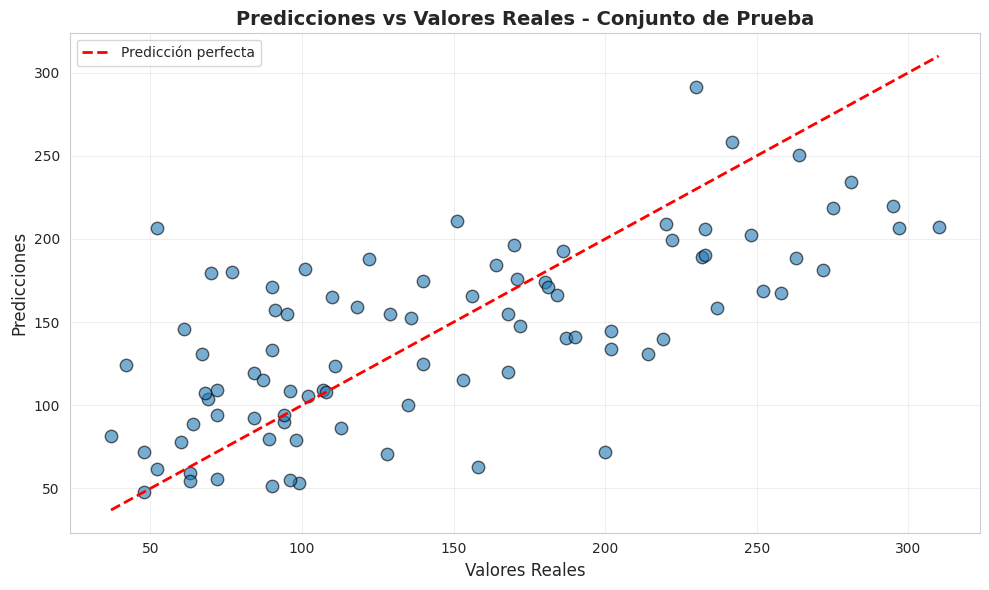

In [14]:
# Visualizar predicciones vs valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors='k', s=80)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         'r--', lw=2, label='Predicción perfecta')
plt.xlabel('Valores Reales', fontsize=12)
plt.ylabel('Predicciones', fontsize=12)
plt.title('Predicciones vs Valores Reales - Conjunto de Prueba',
          fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 9. Resumen Final

Este análisis ha completado las siguientes etapas:

1. ✓ Carga y descripción del dataset de Diabetes
2. ✓ Definición del problema de regresión
3. ✓ Análisis exploratorio de datos (EDA):
   - Identificación de tipos de datos
   - Selección de características
   - Visualización de distribuciones
   - Análisis de valores nulos
   - Matriz de correlación
   - Descripción de hallazgos
4. ✓ Creación del pipeline de preprocesamiento con StandardScaler
5. ✓ Partición de datos en entrenamiento (80%) y prueba (20%)
6. ✓ Entrenamiento del modelo de Regresión Lineal
7. ✓ Generación de predicciones en el conjunto de prueba

El pipeline está completo y listo para su uso, evitando data leakage al integrar preprocesamiento y modelo en una sola estructura.

**Próximos pasos sugeridos (fuera del alcance de esta actividad):**
- Evaluar métricas de desempeño (RMSE, MAE, R²)
- Probar otros algoritmos (Ridge, Lasso, Random Forest)
- Realizar validación cruzada
- Optimizar hiperparámetros